Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [41]:
NAME = ""
COLLABORATORS = ""

---

# Lab 1: Intro to Computer Vision with OpenCV
The objective of this lab is to:
- introduce image processing basics with OpenCV
- setup local EAI enviroment
- submission / *git*iquette 

## Working on the server
### Making Jupy work

OpenCV is installed for all on Jupy. 

In [2]:
import cv2 #why cv2 if this is version 4???

In [3]:
#prefer 4.0 or higher
cv2.__version__

'4.2.0'

In [4]:
import numpy as np

In [5]:
#user friendly utility functions for CV:
import imutils

In [6]:
#Read an img:
img = cv2.imread('europeslostf.jpg',-1) #last param?

In [6]:
img.shape
# img.dtype
#what type is img? what is 3?

(1280, 853, 3)

In [10]:
#Display image:
#below is how we would usually do it, but won't work on a server 
# should work on your PC:
cv2.imshow('headline', img)
cv2.waitKey(0)
# cv2.destroyAllWindows()
#work around:

99

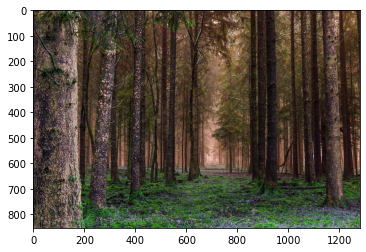

In [16]:
from matplotlib import pyplot as plt

# cv2.imshow(img)
# plt.imshow(img) 
# plt.imshow(imutils.opencv2matplotlib(img)) #BGR vs RGB
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.show()

## Edge Detection

[Intro to edge detection](https://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html) on OpenCV site.

[Wiki example](https://en.wikipedia.org/wiki/Canny_edge_detector#/media/File:%C3%84%C3%A4retuvastuse_n%C3%A4ide.png)

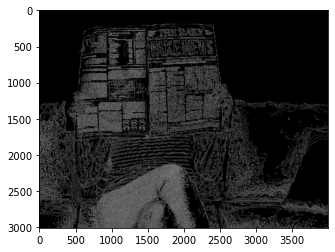

In [27]:
img_gray = cv2.imread('/home/memo/public/fake_news.jpg',0)
#Canny Edge Detection
edgeMap = cv2.Canny(img_gray, 10, 43) #min/max edge gradient threshold
#orig
# plt.imshow(imutils.opencv2matplotlib(img_gray))
#edgemap
plt.imshow(imutils.opencv2matplotlib(edgeMap))


In [28]:
#example from imutils
# https://github.com/jrosebr1/imutils/blob/master/demos/perspective_transform.py

# load the notecard code image, clone it, and initialize the 4 points
# that correspond to the 4 corners of the notecard
notecard = cv2.imread("/home/memo/public/eaix/notecard.png")
clone = notecard.copy()


In [29]:
from imutils import perspective

#Drawing functions: circle, line, ellipse, putText

#mark the edges of the notecard
pts = np.array([(73, 239), (356, 117), (475, 265), (187, 443)])

# loop over the points and draw them on the cloned image
for (x, y) in pts:
    cv2.circle(clone, (x, y), 10, (0, 255, 0), -1)


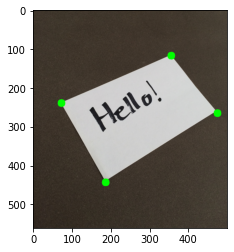

In [30]:
# show the original
plt.imshow(imutils.opencv2matplotlib(clone))


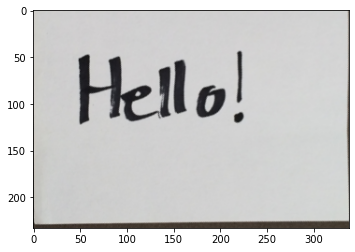

In [32]:
# apply the four point tranform to obtain a "birds eye view" of
# the notecard
warped = perspective.four_point_transform(notecard, pts)
# show the warped image
plt.imshow(imutils.opencv2matplotlib(warped))


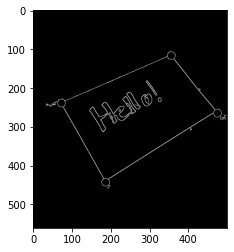

In [39]:
#Manual edge detection: lower/higher thereshold
target = clone #clone vs warped vs img_gray
#Manual edge detection
edgeMap = cv2.Canny(target, 20, 200)
#Automatic Canny Edge Detection
# edgeMap = imutils.auto_canny(target)

#edgemap
plt.imshow(imutils.opencv2matplotlib(edgeMap))


[you can now build a document scanner](https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/)

## Set up your PC

Not everything we need can be done on Jupy. 

### Install python 
Win: bashonwindows or other work arounds;
	- Ubuntu: https://www.liquidweb.com/kb/how-to-setup-a-python-virtual-environment-on-windows-10/
	- Homebrew-like: https://docs.python-guide.org/starting/install3/win/
Mac: https://docs.python-guide.org/dev/virtualenvs/

### Install CV2:
Install OpenCV 4 in a virual env:
``` 
$ pip install virtualenv`
#make your virtual life eaiser with some optional commands:
#windows:
$ pip install virtualenvwrapper-win
#others:
$ pip install virtualenvwrapper
#get your editor/nano: ~/.bashrc and append:
	# virtualenv and virtualenvwrapper
	export WORKON_HOME=$HOME/.virtualenvs
	#if ubuntu:
	export VIRTUALENVWRAPPER_PYTHON=/usr/bin/python3
	#if Mac:
	export VIRTUALENVWRAPPER_PYTHON=/usr/local/bin/python3
	#In Windows, the default path for WORKON_HOME is %USERPROFILE%Envs
	source /usr/local/bin/virtualenvwrapper.sh
$ source ~/.bashrc
```

### Create an env for cv and install
```
$ mkvirtualenv cv -p python3
$ pip install opencv-contrib-python
#super user friendly utility functions for CV:
$ pip install imutils argparse
```


### How to use venv?
- workon : Activate/switch to a virtual environment. Remember, you can have as many environments as you’d like.
- deactivate: Jumps out of a virtual environment and you’ll be working with your system.
- rmvirtualenv : Deletes a virtual environment.



### Test installation
```
$ workon cv
$ python
Python 3.6.3 (default, Oct 4 2017, 06:09:15) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> import cv2
>>> cv2.__version__
'4.0.1'
>>> import imutils
>>>
```

## How to push to git?

It is hard for others to reproduce your code as different versions of libraries are constantly being released. 

Be nice to your future-self
`$ pip freeze > requirements.txt`

Then, others can re-create your env via:
`$ pip install -r requirements.txt`

Note: as you update your libraries, conflicts may arise with this method. 

I don't know a perfect solution.

## Exercises:

1. try `cv2.imshow()`: 
    - in your PC, instead of plt.imshow()
    - Save if 's' pressed
    - Quit if 'q' pressed
    - Rotate left/right using arrow keys or similar
    - Add [text to image](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#puttext) and save it.
    - [Hint](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)
1. fix `plt.imshow()`: use numpy swapping to display 'correct' image color (BGR vs RGB)
1. [you can now build a document scanner](https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/)

## Submission

- Finish exercises
- Create a repo on your favorite git (hub, lab, etc.)
    - call it EAI20
    - this can go under lab1 folder in EAI20
    - can be private
    - add me ('ergezerm@wit.edu' or 'memoatwit')
    - push code
    - add Readme.md with link to results 
        - can be a capture uploaded to youtube or similar
        - 60 sec cap

In [1]:
img = cv2.imread('europeslostf.jpg',-1) #last param?
cv2.imshow('headline',img)
cv2.waitKeyEx()

NameError: name 'cv2' is not defined

In [7]:
import cv2 #why cv2 if this is version 4???
import numpy as np
import imutils
import os
from matplotlib import pyplot as plt

In [8]:
cv2.__version__

'4.2.0'

In [9]:
img = cv2.imread('europeslostf.jpg',-1) #last param?
#prefer 4.0 or higher

In [9]:
cv2.imshow('headline', img)

path = os.getcwd()
orig = img.copy()
while True:
    key = cv2.waitKeyEx(0)
    print(key)
    if key == 113:
        cv2.destroyAllWindows()
        break
    elif key == 115:
        cv2.imwrite(path+"\copiedImage.jpg",img, [cv2.IMWRITE_JPEG_QUALITY, 100])
        print("Image is saved in "+path)
    elif key == 2555904:
        img_rotate = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
        cv2.imshow("headline",img_rotate)
        img=img_rotate
    elif key == 2424832:
        img_rotate = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imshow("headline",img_rotate)
        img=img_rotate
    elif key == 2490368:
        comp = orig == img
        res = comp.all()
        print(res)
        if res == True:
            print("")
        else:  
            cv2.imshow("headline",orig)
            img=orig
    elif key == 2621440:
        img_rotate = cv2.flip(img,0)
        cv2.imshow("headline",img_rotate)
        img=img_rotate

2490368
True

2490368
True

2490368
True

2621440
2490368
False
113


In [4]:
nImg=img.copy()
org=(800,200)
cv2.putText(nImg,"Emerson",org,fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=2,color=(255,255,255),thickness=2)
cv2.imshow("new image",nImg)
cv2.imwrite(path+"\changedImage.jpg",img, [cv2.IMWRITE_JPEG_QUALITY, 100])
print("Image is saved in "+path)
cv2.waitKey(0)

NameError: name 'path' is not defined

In [5]:
orig = img
cv2.imshow('f',orig)

In [6]:
fk = cv2.flip(img,0)
g = cv2.flip(fk,0)
fk1 = cv2.flip(g,0)
comp = fk1 == fk
a= comp.all()
a

True

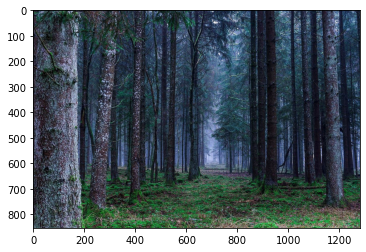

In [17]:
b,g,r = cv2.split(img)
chngedImage = cv2.merge((r,g,b))
# cv2.imshow(img)
plt.imshow(chngedImage)

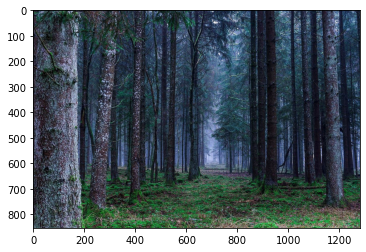

In [15]:
plt.imshow(imutils.opencv2matplotlib(img))

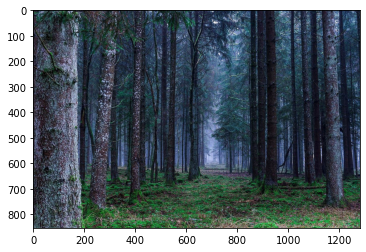

In [19]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

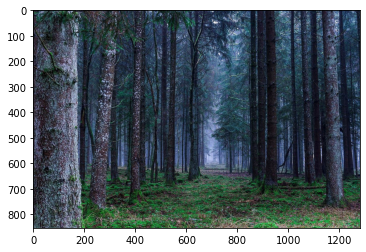

In [40]:
plt.imshow(img[:,:,::-1])